# Underwater Plastic Pollution Detection
[![image](https://storage.googleapis.com/kaggle-datasets-images/4675383/7950266/3c3fe3a3723fca6befa43f6eaec3d7fd/dataset-cover.jpg?t=2024-03-26-19-09-56)](image)

> An Image Dataset of Plastics found Underwater for Detection & Monitorin.

> [Kaggle Dataset](https://www.kaggle.com/datasets/arnavs19/underwater-plastic-pollution-detection)


# Import Libraries

In [1]:
! pip install -q ultralytics
! sudo apt install -qq tree

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 15.1 MB/s eta 0:00:00
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 123633 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for

In [2]:
import os
import cv2
import time
import shutil
import kagglehub
from PIL import Image
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Download Dataset

In [3]:
# Download latest version
path = kagglehub.dataset_download("arnavs19/underwater-plastic-pollution-detection")

print(f"Path to dataset files : {path}")

100%|██████████| 231M/231M [00:02<00:00, 106MB/s]

Extracting files...


Path to dataset files : /root/.cache/kagglehub/datasets/arnavs19/underwater-plastic-pollution-detection/versions/1


In [4]:
source = path
destination = "/content"
shutil.move(source, destination)

print(f"The folder has been moved to {destination}")

The folder has been moved to /content


In [5]:
!tree --dirsfirst -L 2  "/content/1/underwater_plastics"

/content/1/underwater_plastics
├── test
│   ├── images
│   └── labels
├── train
│   ├── images
│   └── labels
├── valid
│   ├── images
│   └── labels
└── data.yaml

9 directories, 1 file


In [6]:
def count_files_in_folders(folder_path):
  category_counts = {}

  for category in os.listdir(folder_path):
      category_path = os.path.join(folder_path, category)

      if os.path.isdir(category_path):
          image_count = len([file for file in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, file))])
          category_counts[category] = image_count

  for category, count in category_counts.items():
      print(f"Under {folder_path} Folder : '{category}' has {count} files.")
  print()

In [7]:
count_files_in_folders("/content/1/underwater_plastics/train")
count_files_in_folders("/content/1/underwater_plastics/test" )
count_files_in_folders("/content/1/underwater_plastics/valid")

Under /content/1/underwater_plastics/train Folder : 'images' has 3628 files.
Under /content/1/underwater_plastics/train Folder : 'labels' has 3628 files.

Under /content/1/underwater_plastics/test Folder : 'images' has 501 files.
Under /content/1/underwater_plastics/test Folder : 'labels' has 501 files.

Under /content/1/underwater_plastics/valid Folder : 'images' has 1001 files.
Under /content/1/underwater_plastics/valid Folder : 'labels' has 1007 files.



In [8]:
image   = cv2.imread("/content/1/underwater_plastics/train/images/1-1_jpg.rf.3c35c15f5361d33821647bfd181b0af7.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


# Build Model

In [9]:
model = YOLO("yolov10m.yaml") # build a model from YAML
model = YOLO("yolov10m.pt")   # Transfer the weights from a pretrained model (recommended for training)

100%|██████████| 32.1M/32.1M [00:00<00:00, 191MB/s]


In [10]:
project = "underwater_plastics_yolov10m/results" # Define a project --> Destination directory for all results
name    = time.strftime('%Y-%m-%d', time.localtime()) # Define subdirectory for this specific training

# Training

In [11]:
#Train the model
results = model.train(
    data = os.path.join("/content/1/underwater_plastics/data.yaml"),
    project = project,
    name = name,
    epochs = 20,
    patience = 0 , #setting patience=0 to disable early stopping,
    batch = 16,
    imgsz=640
)

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10m.pt, data=/content/1/underwater_plastics/data.yaml, epochs=20, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=underwater_plastics_yolov10m/results, name=2024-12-12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=F

100%|██████████| 755k/755k [00:00<00:00, 11.9MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1     78720  ultralytics.nn.modules.block.SCDown          [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1    228672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 67.1MB/s]


AMP: checks passed ✅


train: Scanning /content/1/underwater_plastics/train/labels... 3628 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3628/3628 [00:02<00:00, 1632.90it/s]


train: New cache created: /content/1/underwater_plastics/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/1/underwater_plastics/valid/labels... 1001 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1001/1001 [00:01<00:00, 794.70it/s]


val: New cache created: /content/1/underwater_plastics/valid/labels.cache
Plotting labels to underwater_plastics_yolov10m/results/2024-12-12/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 129 weight(decay=0.0), 142 weight(decay=0.0005), 141 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to underwater_plastics_yolov10m/results/2024-12-12
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      9.08G      2.794      7.326      3.412         44        640: 100%|██████████| 227/227 [02:36<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]


                   all       1001       1891      0.554      0.131      0.116      0.064

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      9.03G      3.015      5.042      3.542         55        640: 100%|██████████| 227/227 [02:38<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.69it/s]


                   all       1001       1891      0.331      0.162      0.131      0.075

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         9G       3.13      4.981      3.645         54        640: 100%|██████████| 227/227 [02:36<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1001       1891      0.487       0.14      0.119     0.0602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      9.06G      3.082      4.728      3.593         59        640: 100%|██████████| 227/227 [02:31<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]

                   all       1001       1891      0.502      0.239       0.21      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      8.98G      2.978       4.36      3.495         58        640: 100%|██████████| 227/227 [02:28<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


                   all       1001       1891      0.476      0.227      0.207      0.119

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      9.01G      2.921      4.066      3.448         40        640: 100%|██████████| 227/227 [02:28<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]


                   all       1001       1891       0.63      0.245      0.268      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      9.02G      2.839      3.956      3.394         71        640: 100%|██████████| 227/227 [02:29<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]

                   all       1001       1891      0.606      0.255      0.285      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      9.01G      2.811      3.728      3.341         48        640: 100%|██████████| 227/227 [02:29<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]


                   all       1001       1891       0.68      0.308      0.316      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      8.98G      2.721      3.516        3.3         52        640: 100%|██████████| 227/227 [02:29<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


                   all       1001       1891      0.566      0.295      0.319      0.201

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         9G      2.674      3.338      3.228         57        640: 100%|██████████| 227/227 [02:29<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]

                   all       1001       1891      0.614      0.317      0.334      0.211


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      9.01G      2.625      2.909      3.355         38        640: 100%|██████████| 227/227 [02:29<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


                   all       1001       1891      0.651      0.353      0.405       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         9G      2.562      2.692      3.296         23        640: 100%|██████████| 227/227 [02:26<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


                   all       1001       1891      0.633      0.368      0.399       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      8.96G       2.49      2.483      3.212         24        640: 100%|██████████| 227/227 [02:28<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]

                   all       1001       1891      0.507      0.429      0.444      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      9.02G      2.452      2.344      3.185         19        640: 100%|██████████| 227/227 [02:27<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


                   all       1001       1891      0.678      0.402      0.461      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      8.99G      2.385      2.186       3.14         27        640: 100%|██████████| 227/227 [02:28<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]


                   all       1001       1891      0.698      0.406      0.463      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      8.99G       2.33      2.036      3.068         26        640: 100%|██████████| 227/227 [02:26<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.92it/s]


                   all       1001       1891      0.585      0.455      0.493      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      8.97G      2.293      1.971      3.061         44        640: 100%|██████████| 227/227 [02:28<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]

                   all       1001       1891      0.619      0.444      0.488      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      9.01G      2.226      1.823      2.986         36        640: 100%|██████████| 227/227 [02:27<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]

                   all       1001       1891      0.669      0.458      0.546      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      8.99G      2.186       1.73      2.952         28        640: 100%|██████████| 227/227 [02:27<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.94it/s]

                   all       1001       1891      0.731      0.454      0.564      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      9.01G      2.126      1.638      2.904         43        640: 100%|██████████| 227/227 [02:26<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.76it/s]


                   all       1001       1891      0.563      0.495      0.541      0.367

20 epochs completed in 0.954 hours.
Optimizer stripped from underwater_plastics_yolov10m/results/2024-12-12/weights/last.pt, 33.5MB
Optimizer stripped from underwater_plastics_yolov10m/results/2024-12-12/weights/best.pt, 33.5MB

Validating underwater_plastics_yolov10m/results/2024-12-12/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,467,754 parameters, 0 gradients, 63.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]


                   all       1001       1891       0.73      0.454      0.563      0.378
                  Mask         77         90      0.889      0.333      0.664      0.489
                   can         18         20      0.637        0.2      0.383      0.145
             cellphone         61         71      0.895      0.958      0.974       0.86
           electronics         27         40      0.642       0.36      0.471      0.268
               gbottle         36         82      0.657      0.634      0.646      0.458
                 glove         37         55      0.928      0.707      0.847      0.675
                 metal         10         22          1          0      0.127     0.0696
                  misc         48         51      0.374      0.294      0.272      0.153
                   net        146        148      0.773      0.818      0.872      0.586
                  pbag        290        330      0.866      0.909      0.935      0.804
               pbottl

# Evaluating

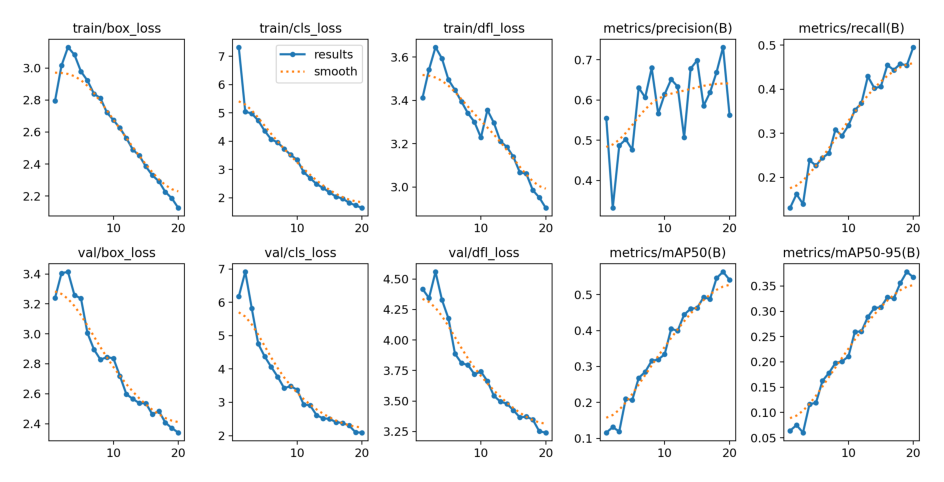

In [12]:
image_path = '/content/underwater_plastics_yolov10m/results/2024-12-12/results.png'
plt.figure(figsize=(12, 6))
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
# Loading the best performing model
Valid_model = YOLO('/content/underwater_plastics_yolov10m/results/2024-12-12/weights/best.pt')
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10m summary (fused): 369 layers, 16,467,754 parameters, 0 gradients, 63.5 GFLOPs


val: Scanning /content/1/underwater_plastics/test/labels... 501 images, 0 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:00<00:00, 627.64it/s]

val: New cache created: /content/1/underwater_plastics/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:15<00:00,  2.03it/s]


                   all        501        966       0.65      0.482       0.56      0.387
                  Mask         33         37      0.858       0.49      0.782      0.608
                   can         13         19      0.638      0.465      0.479       0.23
             cellphone         40         46      0.854      0.957       0.98      0.838
           electronics         14         19      0.624      0.526      0.654      0.402
               gbottle         27         63      0.702      0.492      0.659      0.409
                 glove         23         34      0.967      0.618      0.731      0.617
                 metal          2          5          1          0    0.00346   0.000488
                  misc         30         33      0.372      0.364      0.324       0.18
                   net         63         65      0.694      0.862      0.813      0.531
                  pbag        128        166      0.776      0.958       0.93      0.807
               pbottl

In [14]:
print(f"precision(B)        : {metrics.results_dict['metrics/precision(B)']*100 :.4f}%")
print(f"metrics/recall(B)   : {metrics.results_dict['metrics/recall(B)'   ]*100 :.4f}%")
print(f"metrics/mAP50(B)    : {metrics.results_dict['metrics/mAP50(B)'    ]*100 :.4f}%")
print(f"metrics/mAP50-95(B) : {metrics.results_dict['metrics/mAP50-95(B)' ]*100 :.4f}%")

precision(B)        : 65.0123%
metrics/recall(B)   : 48.1609%
metrics/mAP50(B)    : 56.0044%
metrics/mAP50-95(B) : 38.7221%



image 1/1 /content/1/underwater_plastics/test/images/uwg_g-981_jpg.rf.69d90912b71617cf61fc3b27ebdf38f7.jpg: 640x640 2 pbottles, 35.2ms
Speed: 2.6ms preprocess, 35.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


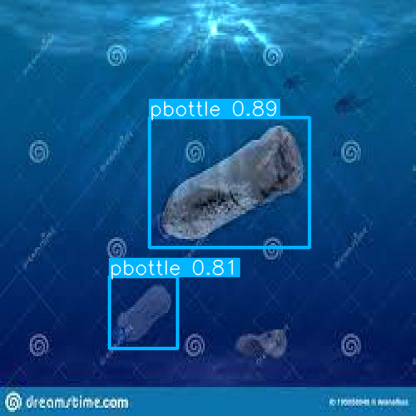


image 1/1 /content/1/underwater_plastics/test/images/uwg_yt-189__fliph_png_jpg.rf.ae44ab85b3fd87c266c8887fe03aa336.jpg: 640x640 1 pbag, 35.5ms
Speed: 4.5ms preprocess, 35.5ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


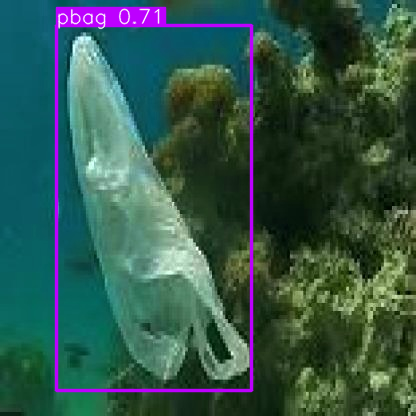


image 1/1 /content/1/underwater_plastics/test/images/uwg_g-492__fliph_jpg.rf.9ea9eacbcdfeaee52424628f8f8b5bcc.jpg: 640x640 2 pbags, 1 pbottle, 35.3ms
Speed: 4.1ms preprocess, 35.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


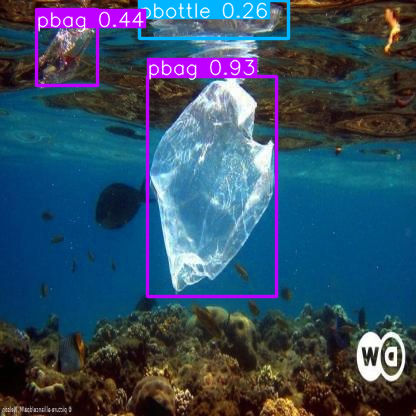


image 1/1 /content/1/underwater_plastics/test/images/uwg_g-151__fliph_jpg.rf.8889636c4168cec6328f41b1b7cdf6cc.jpg: 640x640 1 net, 35.4ms
Speed: 4.3ms preprocess, 35.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


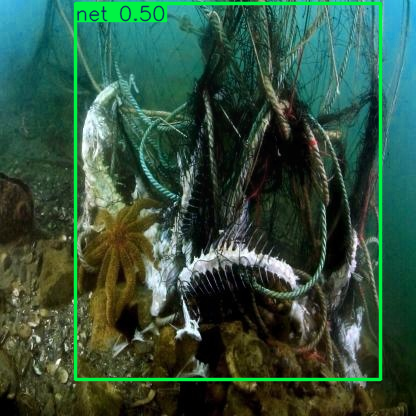


image 1/1 /content/1/underwater_plastics/test/images/uwg_yt-80__fliph_jpg.rf.67124a30d957c330404724d16498b91a.jpg: 640x640 1 misc, 35.4ms
Speed: 4.0ms preprocess, 35.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


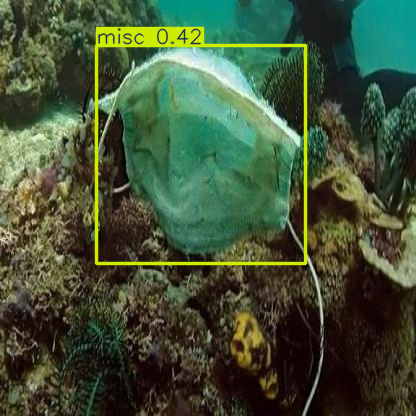

In [15]:
images = os.listdir("/content/1/underwater_plastics/test/images")
for i in range(10):
    image = os.path.join("/content/1/underwater_plastics/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))

In [16]:
# Define the paths
source_dir = '/content/underwater_plastics_yolov10m'
destination_dir = '/content/drive/MyDrive/underwater_plastics_yolov10m'

# Copy the directory to Google Drive
shutil.copytree(source_dir, destination_dir)

'/content/drive/MyDrive/underwater_plastics_yolov10m'